In [70]:
import explain_ensemble
# from diabnet.model import load
from diabnet.data import get_feature_names
from diabnet.ensemble import Ensemble
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates

In [71]:
sns.set()

In [72]:
ensemble = Ensemble('../diabnet/models/model-13-sp-soft-label-positives-2500-dropout0-bn-decay-flood-hyperopt')

../diabnet/models/model-13-sp-soft-label-positives-2500-dropout0-bn-decay-flood-hyperopt


In [73]:
# feature names
feat_names = get_feature_names("../datasets/visits_sp_unique_test_positivo_1000_random_0.csv", BMI=False, sex=True, parents_diagnostics=True)

In [74]:
# predictor = load('../diabnet/models/model-sp-soft-label-positives-1000-decay2.pth')
# feat_names = get_feature_names("../datasets/visits_sp_unique_test_positivo_1000_random_0.csv", BMI=False, sex=True, parents_diagnostics=True)

In [75]:
e_train = explain_ensemble.ExplainModel(ensemble, feat_names, "../datasets/visits_sp_unique_train_positivo_1000_random_0.csv")

In [76]:
e_test = explain_ensemble.ExplainModel(ensemble, feat_names, "../datasets/visits_sp_unique_test_positivo_1000_random_0.csv")

In [77]:
def feat_importance(values, age, sex, samples_per_model=1):
    imp = values.calc_attr(age, sex, samples_per_model=samples_per_model)
    s = {k: [np.mean(imp[k]), np.median(imp[k])] for k in imp if len(imp[k]) > 0}
    df = pd.DataFrame.from_dict(s, orient='index')
    df.rename(columns={0:f'{sex}{age}_mean', 1:f'{sex}{age}_median'}, inplace=True)
    # df.sort_values(by=0, ascending=False).head(50)
    return df
    

In [78]:
# feature importance - train x test
# age: 50, sex: X

In [79]:
feat_imp_train = feat_importance(e_train, 50, 'X', samples_per_model=1)
feat_imp_test = feat_importance(e_test, 50, 'X', samples_per_model=1)

In [80]:
tmp = feat_imp_train.join(feat_imp_test, how='inner', lsuffix='_train', rsuffix='_test')
tmp = tmp[abs((tmp['X50_mean_train']+tmp['X50_mean_test']))/2 > 0.05]
tmp['SNP'] = tmp.index
# parallel_coordinates(tmp, '1_M50', cols='M50_mean','F50_mean'])
tmp = tmp.sort_values(by="X50_mean_train")
tmp

,X50_mean_train,X50_median_train,X50_mean_test,X50_median_test,SNP
snp_17_15464147,-0.116282,-0.093337,-0.106812,-0.088130,snp_17_15464147
snp_16_19717582,-0.080273,-0.051199,-0.076234,-0.063096,snp_16_19717582
snp_21_11058226,-0.072446,-0.061606,-0.068769,-0.057287,snp_21_11058226
snp_10_124502623,0.046378,0.031283,0.060270,0.043912,snp_10_124502623
snp_1_24057357,0.053275,0.039795,0.069950,0.057780,snp_1_24057357
...,...,...,...,...,...
snp_3_124845764,0.186678,0.155331,0.166641,0.141655,snp_3_124845764
snp_11_120855337,0.204589,0.168467,0.220705,0.205502,snp_11_120855337
snp_1_209147965,0.211419,0.180252,0.187606,0.103662,snp_1_209147965
snp_10_15653813,0.225288,0.205771,0.204797,0.192036,snp_10_15653813


In [81]:
tmp = feat_imp_train.join(feat_imp_test, how='inner', lsuffix='_train', rsuffix='_test')
tmp = tmp[abs((tmp['X50_mean_train']+tmp['X50_mean_test']))/2 > 0.05]
tmp['SNP'] = tmp.index
# parallel_coordinates(tmp, '1_M50', cols='M50_mean','F50_mean'])
tmp = tmp.sort_values(by="X50_mean_train")
tmp

,X50_mean_train,X50_median_train,X50_mean_test,X50_median_test,SNP
snp_17_15464147,-0.116282,-0.093337,-0.106812,-0.088130,snp_17_15464147
snp_16_19717582,-0.080273,-0.051199,-0.076234,-0.063096,snp_16_19717582
snp_21_11058226,-0.072446,-0.061606,-0.068769,-0.057287,snp_21_11058226
snp_10_124502623,0.046378,0.031283,0.060270,0.043912,snp_10_124502623
snp_1_24057357,0.053275,0.039795,0.069950,0.057780,snp_1_24057357
...,...,...,...,...,...
snp_3_124845764,0.186678,0.155331,0.166641,0.141655,snp_3_124845764
snp_11_120855337,0.204589,0.168467,0.220705,0.205502,snp_11_120855337
snp_1_209147965,0.211419,0.180252,0.187606,0.103662,snp_1_209147965
snp_10_15653813,0.225288,0.205771,0.204797,0.192036,snp_10_15653813


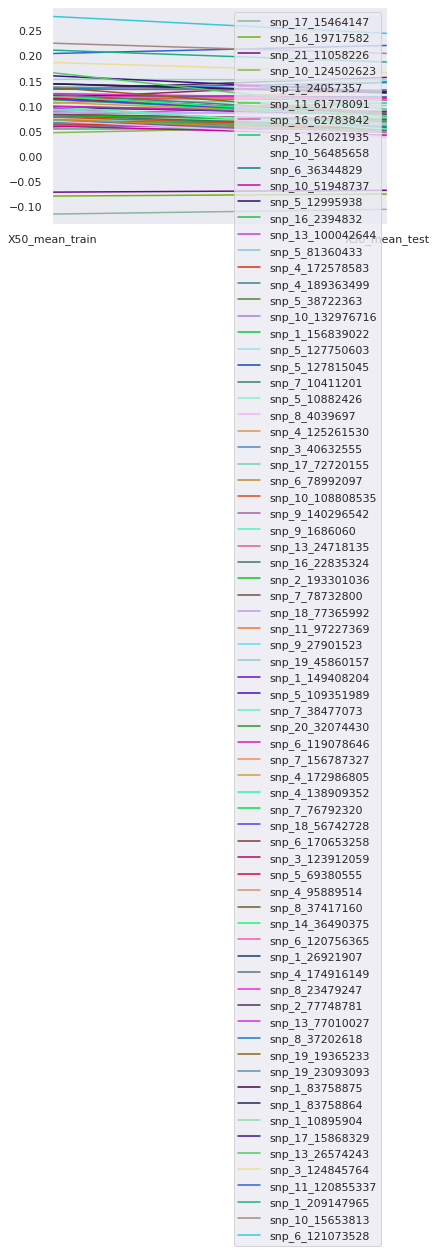

In [82]:
parallel_coordinates(tmp, 'SNP', cols=['X50_mean_train', 'X50_mean_test'])

In [83]:
# feature importance - M x F
# age: 50, set: test

In [84]:
feat_imp_M50 = feat_importance(e_test, 50, 'M', samples_per_model=1)
feat_imp_F50 = feat_importance(e_test, 50, 'F', samples_per_model=1)

In [85]:
tmp = feat_imp_M50.join(feat_imp_F50, how='inner')
tmp = tmp[abs((tmp['M50_mean']+tmp['F50_mean']))/2 > 0.05]
tmp['SNP'] = tmp.index
# parallel_coordinates(tmp, '1_M50', cols='M50_mean','F50_mean'])
tmp.sort_values(by="M50_mean")

,M50_mean,M50_median,F50_mean,F50_median,SNP
snp_17_15464147,-0.097192,-0.081073,-0.111763,-0.091640,snp_17_15464147
snp_21_11058226,-0.077648,-0.066124,-0.066370,-0.054886,snp_21_11058226
snp_10_108808535,0.044666,0.036047,0.062441,0.044207,snp_10_108808535
snp_13_100042644,0.047265,0.034888,0.052828,0.037969,snp_13_100042644
snp_7_111370265,0.049975,0.025997,0.051963,0.029066,snp_7_111370265
snp_16_22835324,0.053054,0.043220,0.061084,0.044202,snp_16_22835324
snp_3_86048371,0.055204,0.023303,0.044983,0.020406,snp_3_86048371
snp_3_86458621,0.056195,0.024628,0.048781,0.024221,snp_3_86458621
snp_11_61778091,0.056372,0.050834,0.051990,0.045006,snp_11_61778091
snp_5_126021935,0.057078,0.043895,0.053174,0.039259,snp_5_126021935


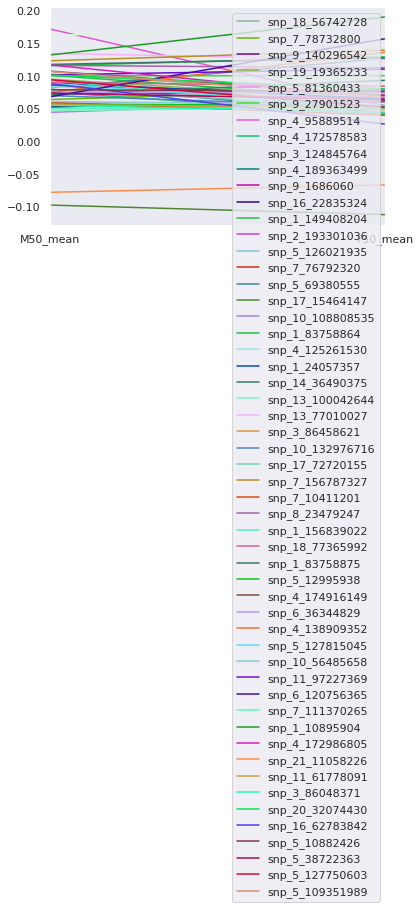

In [86]:
parallel_coordinates(tmp, 'SNP', cols=['M50_mean', 'F50_mean'])

In [87]:
# feature importance - lifelong variability

In [88]:
feat_imp_by_age = feat_importance(e_test, 20, 'X', samples_per_model=1) 
for age in range(30, 90, 10):
    feat_imp_by_age = feat_imp_by_age.join(feat_importance(e_test, age, 'X', samples_per_model=1),how='inner')

/home/jgcarvalho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


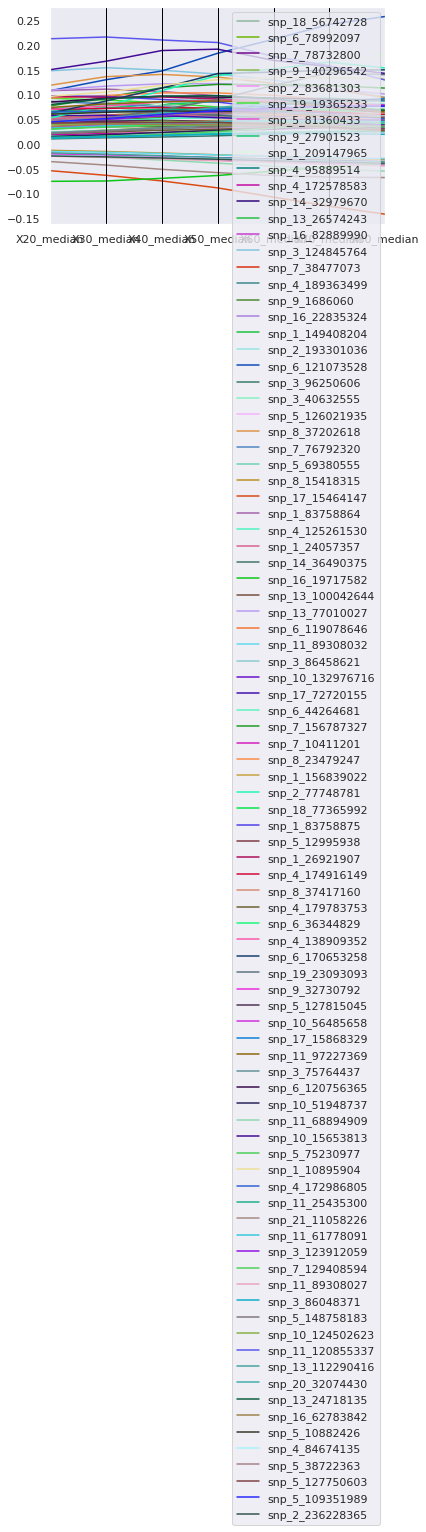

In [89]:
tmp = feat_imp_by_age[abs(feat_imp_by_age['X80_mean']) > 0.04]
tmp['SNP'] = tmp.index
parallel_coordinates(tmp, 'SNP', cols=[i for i in feat_imp_by_age.columns if 'median' in i])

In [90]:
tmp = feat_imp_M50.join(feat_imp_F50, how='inner')
tmp = tmp[abs((tmp['M50_mean']+tmp['F50_mean']))/2 > 0.04]
tmp['SNP'] = tmp.index
# parallel_coordinates(tmp, '1_M50', cols='M50_mean','F50_mean'])
tmp.sort_values(by="M50_mean")

,M50_mean,M50_median,F50_mean,F50_median,SNP
snp_17_15464147,-0.097192,-0.081073,-0.111763,-0.091640,snp_17_15464147
snp_21_11058226,-0.077648,-0.066124,-0.066370,-0.054886,snp_21_11058226
snp_16_82889990,-0.044874,-0.032943,-0.039643,-0.029586,snp_16_82889990
snp_11_68894909,-0.044214,-0.034978,-0.045934,-0.039168,snp_11_68894909
snp_11_89308027,-0.042837,-0.032042,-0.047249,-0.034345,snp_11_89308027
...,...,...,...,...,...
snp_7_156787327,0.123560,0.103615,0.139753,0.127440,snp_7_156787327
snp_1_10895904,0.132408,0.119063,0.190573,0.152597,snp_1_10895904
snp_13_77010027,0.134804,0.125769,0.125333,0.114360,snp_13_77010027
snp_3_124845764,0.161982,0.136245,0.180032,0.174091,snp_3_124845764


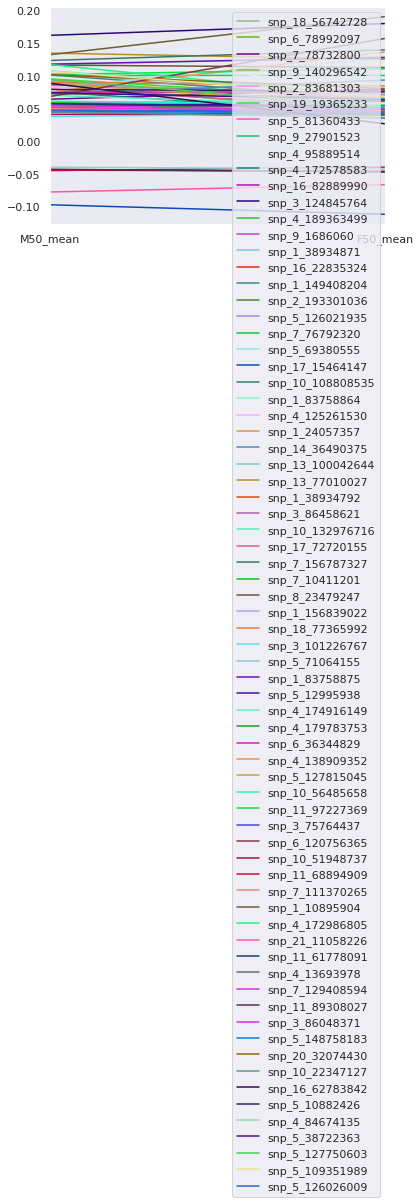

In [91]:
parallel_coordinates(tmp, 'SNP', cols=['M50_mean', 'F50_mean'])

In [92]:
feat_imp_by_age = feat_importance(e_test, 20, 'X', samples_per_model=1) 
for age in range(30, 90, 10):
    feat_imp_by_age = feat_imp_by_age.join(feat_importance(e_test, age, 'X', samples_per_model=1),how='inner')
    

In [93]:
[i for i in feat_imp_by_age.columns if 'mean' in i]

['X20_mean',
 'X30_mean',
 'X40_mean',
 'X50_mean',
 'X60_mean',
 'X70_mean',
 'X80_mean']

/home/jgcarvalho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


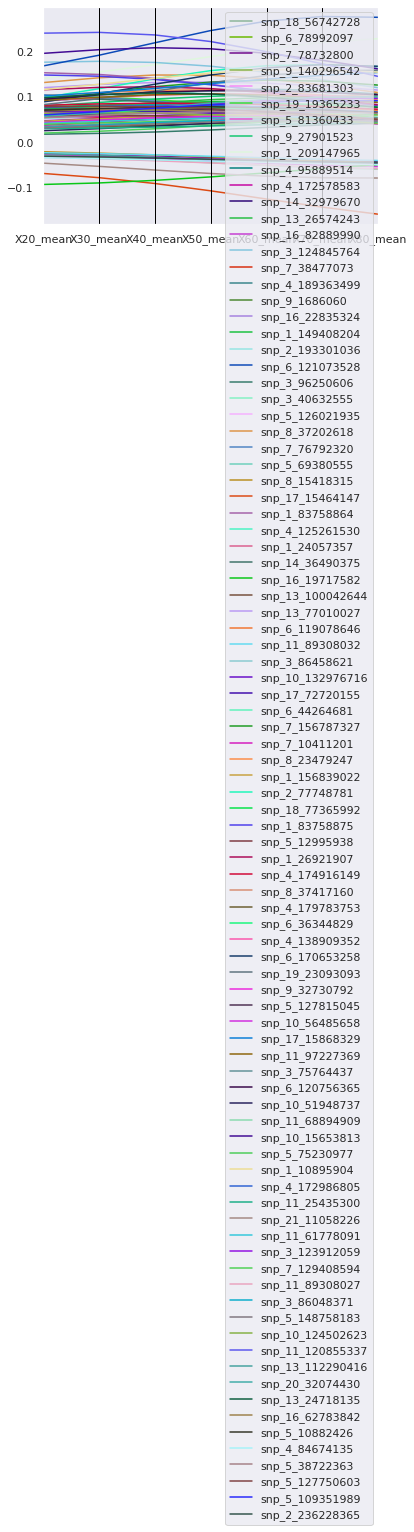

In [94]:
tmp = feat_imp_by_age[abs(feat_imp_by_age['X80_mean']) > 0.04]
tmp['SNP'] = tmp.index
parallel_coordinates(tmp, 'SNP', cols=[i for i in feat_imp_by_age.columns if 'mean' in i])

In [95]:
feat_imp_by_age[['X90_mean']].boxplot()

KeyError: "None of [Index(['X90_mean'], dtype='object')] are in the [columns]"

In [ ]:
feat_imp_M50.sort_values(by=0, ascending=False).head(50)

In [ ]:
imp = e_test.calc_attr(20, 'X', samples_per_model=1)

In [ ]:
s

In [ ]:
dfnew.sort_values(by=0, ascending=True).head(50)

In [ ]:
import pandas as pd
dfnew = pd.DataFrame.from_dict(s, orient='index')
dfnew.sort_values(by=0, ascending=False).head(50)

In [ ]:
import pandas as pd
dfnew = pd.DataFrame.from_dict(s, orient='index')
dfnew.sort_values(by=0, ascending=False).head(50)

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(s, orient='index')

In [ ]:
df.sort_values(by=0, ascending=True).head(50)

In [ ]:
df.sort_values(by=0, ascending=True).head(50)

In [ ]:
import numpy as np
np.mean(df.values, axis=0)

In [ ]:
df_20_X = e_train.attr_snps_mean(attrs, mask).rename(columns={0: "age=20,sex=X"})

In [ ]:
df_20_X.sort_values(by="age=20,sex=X", ascending=False).head(50)

In [ ]:
attr, mask = e_train.calc_attr(20, 'X', samples=1)
df_20_X = e_train.attr_snps_mean(attr, mask).rename(columns={0: "age=20,sex=X"})
attr, mask = e_train.calc_attr(20, 'M', samples=1)
df_20_M = e_train.attr_snps_mean(attr, mask).rename(columns={0: "age=20,sex=M"})
attr, mask = e_train.calc_attr(20, 'F', samples=1)
df_20_F = e_train.attr_snps_mean(attr, mask).rename(columns={0: "age=20,sex=F"})

In [ ]:
df_decay2 = df_20_X.sort_values(by="age=20,sex=X", ascending=False)
df_decay2.head(20)

In [ ]:
df_decay1 = df_20_X.sort_values(by="age=20,sex=X", ascending=False)
df_decay1.head(20)

In [ ]:
df_train[df_train.index=='snp_4_172986805']

In [ ]:
attr, mask = e_train.calc_attr(50, 'X', samples=1)
df_50_X = e_train.attr_snps_mean(attr, mask).rename(columns={0: "age=50,sex=X"})
attr, mask = e_train.calc_attr(50, 'M', samples=1)
df_50_M = e_train.attr_snps_mean(attr, mask).rename(columns={0: "age=50,sex=M"})
attr, mask = e_train.calc_attr(50, 'F', samples=1)
df_50_F = e_train.attr_snps_mean(attr, mask).rename(columns={0: "age=50,sex=F"})

In [ ]:
df_train = df_20_X.join([df_20_F,df_20_M,df_50_X,df_50_F,df_50_M])

In [ ]:
df_train.sort_values(by="age=20,sex=X", ascending=False).head(50)

In [ ]:
df_train.sort_values(by="age=50,sex=X", ascending=False).tail(50)

In [ ]:
plt.boxplot(df_20_X.values)

In [ ]:
attr, mask = e_test.calc_attr(20, 'X', samples=1)
df_20_X_test = e_test.attr_snps_mean(attr, mask).rename(columns={0: "age=20,sex=X"})
attr, mask = e_test.calc_attr(20, 'M', samples=1)
df_20_M_test = e_test.attr_snps_mean(attr, mask).rename(columns={0: "age=20,sex=M"})
attr, mask = e_test.calc_attr(20, 'F', samples=1)
df_20_F_test = e_test.attr_snps_mean(attr, mask).rename(columns={0: "age=20,sex=F"})

In [ ]:
attr, mask = e_test.calc_attr(50, 'X', samples=1)
df_50_X_test = e_test.attr_snps_mean(attr, mask).rename(columns={0: "age=50,sex=X"})
attr, mask = e_test.calc_attr(50, 'M', samples=1)
df_50_M_test = e_test.attr_snps_mean(attr, mask).rename(columns={0: "age=50,sex=M"})
attr, mask = e_test.calc_attr(50, 'F', samples=1)
df_50_F_test = e_test.attr_snps_mean(attr, mask).rename(columns={0: "age=50,sex=F"})

In [ ]:
df_test = df_20_X_test.join([df_20_F_test,df_20_M_test,df_50_X_test,df_50_F_test,df_50_M_test])

In [ ]:
df_test.sort_values(by="age=20,sex=X", ascending=False).head(50)

In [ ]:
df_test.sort_values(by="age=20,sex=X", ascending=False).tail(50)

In [ ]:
df = df_train.join(df_test, lsuffix='_train', rsuffix='_test')

In [ ]:
sns.pairplot(df.sort_values(by="age=20,sex=X_train", ascending=False).head(20))
# plt.savefig('pairplot.svg')

In [ ]:
df.sort_values(by="age=20,sex=X_train", ascending=False).head(20)

In [ ]:
df_sel = df.reindex(df["age=20,sex=X_train"].abs().sort_values(ascending=False).index).head(100)

In [ ]:
df_sel

In [ ]:
tmp = dict(Counter([s[:s.index('_',4)] for s in list(df_sel.index)]))
sns.barplot(x=list(tmp.keys()), y=list(tmp.values()))

In [ ]:
df_not_sel = df.reindex(df["age=20,sex=X_train"].abs().sort_values(ascending=False).index).tail(500)

In [ ]:
Counter([s[:s.index('_',4)] for s in list(df_not_sel.index)])

In [ ]:
list(tmp.values())

In [ ]:
plt.subplot(141)
plt.title("Precision")
plt.barh(y=list(tmp.keys()),width=list(tmp.values()))
# plt.xlim(0,1)
plt.subplot(142)
plt.title("Recall")
plt.barh(y=list(tmp.keys()),width=list(tmp.values()))
# plt.xlim(0,1)
plt.yticks([])
plt.subplot(143)
plt.title("F1-Score")
plt.barh(y=list(tmp.keys()),width=list(tmp.values()))
# plt.xlim(0,1)
plt.yticks([])
plt.subplot(144)
plt.title("Frequency")
plt.barh(y=list(tmp.keys()),width=list(tmp.values()))
plt.xscale('log')
plt.yticks([])

In [ ]:
feat_imp_M50.sort_values(by='M50_mean')

In [ ]:
feat_imp_M50.sort_values(by='M50_mean')

In [ ]:
plt.boxplot(feat_imp_M50['M50_mean'])